In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px

!pip install pyECLAT -q
from pyECLAT import ECLAT

In [3]:
df = pd.read_csv("/content/bread basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [5]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [6]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [7]:

df['hour'] = df['date_time'].dt.hour
df['date'] = df['date_time'].dt.date
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,hour,date,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,9,2016-10-30,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016


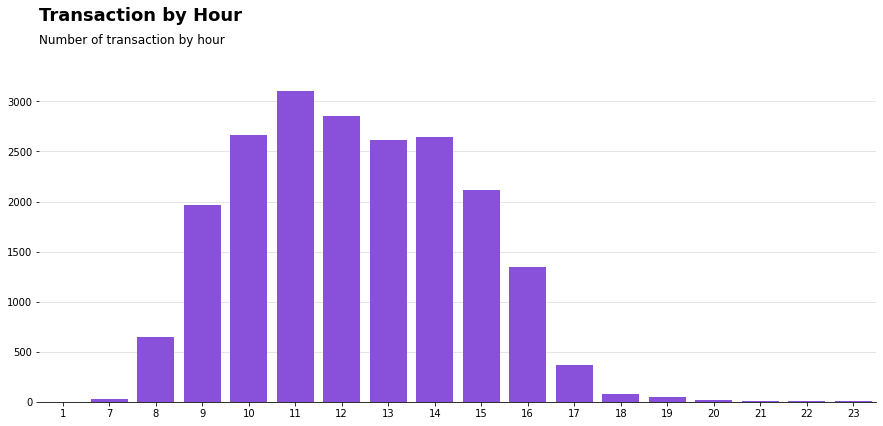

In [8]:
fig, hourT = plt.subplots(figsize=(15, 6))


hourT = sns.countplot(data=df, x='hour', color='#8539F0')
hourT.set_title("Transaction by Hour", loc='left', fontweight='bold', fontfamily = 'san serif', size=18, y=1.15)
hourT.text(0,1.1, 'Number of transaction by hour', size=12, fontfamily='san serif',transform=hourT.transAxes)


for i in ['left', 'top', 'right']:
    hourT.spines[i].set_visible(False)

hourT.grid(axis='y', linestyle='-', alpha=0.4 )
hourT.set_axisbelow(True)

hourT.set_xlabel(None)
hourT.set_ylabel(None)

plt.show();

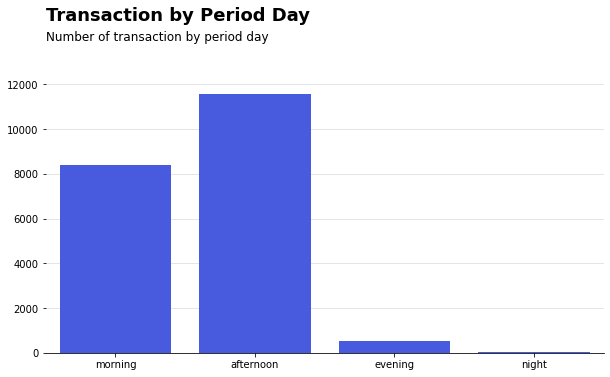

In [9]:
fig, period = plt.subplots(figsize=(10,5))

period = sns.countplot(data=df, x='period_day', color='#2F48F8')
period.set_title("Transaction by Period Day", y=1.20, size=18, fontfamily='san serif', loc='left', fontweight='bold')
period.text(0,1.15, "Number of transaction by period day", transform = period.transAxes, size=12)

for i in ['left', 'top', 'right']:
    period.spines[i].set_visible(False)

period.grid(axis='y', alpha=0.4)
period.set_axisbelow(True)

period.set_xlabel(None)
period.set_ylabel(None)

plt.show();

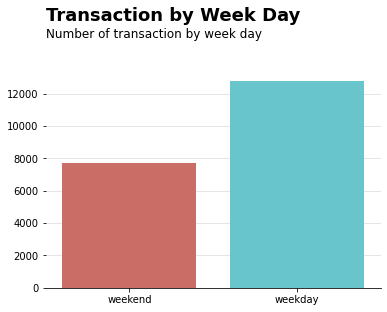

In [10]:
fig, weekday = plt.subplots(figsize=(6,4))

weekday = sns.countplot(data=df, x='weekday_weekend', palette='hls')
weekday.set_title("Transaction by Week Day", loc='left', fontweight='bold', size=18, fontfamily='san serif', y=1.2)
weekday.text(0,1.15, "Number of transaction by week day", transform = weekday.transAxes, size=12)

for i in ['left','top','right']:
    weekday.spines[i].set_visible(False)

weekday.grid(alpha=0.4, axis='y')
weekday.set_axisbelow(True)

weekday.set_xlabel(None)
weekday.set_ylabel(None)




plt.show()

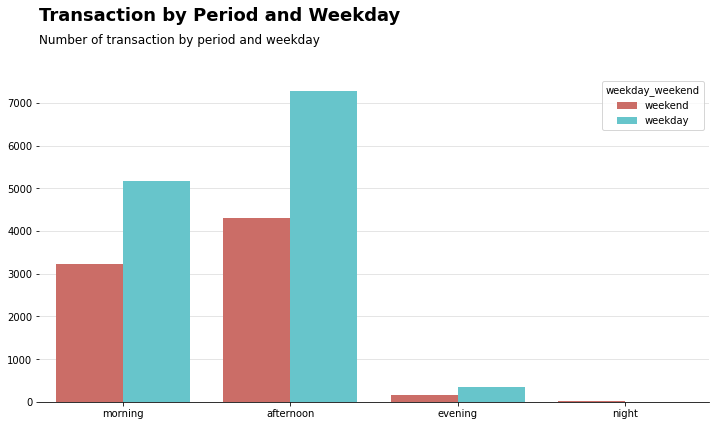

In [11]:
fig, weekday_period = plt.subplots(figsize=(12,6))

weekday_period = sns.countplot(data=df, x='period_day', hue='weekday_weekend', palette='hls')
weekday_period.set_title("Transaction by Period and Weekday", loc='left', y=1.15, fontsize=18, fontweight='bold')
weekday_period.text(0,1.10, "Number of transaction by period and weekday", fontsize=12, transform=weekday_period.transAxes)


for i in ['left', 'top','right']:
    weekday_period.spines[i].set_visible(False)

weekday_period.grid(axis='y', alpha=0.4)
weekday_period.set_axisbelow(True)

weekday_period.set_xlabel(None)
weekday_period.set_ylabel(None)


plt.show()

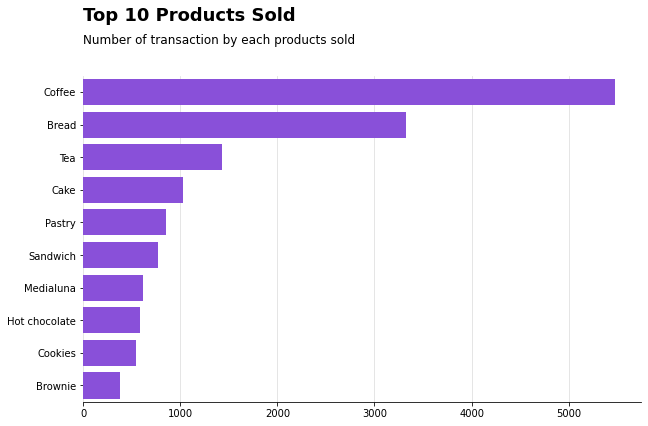

In [12]:

products = df.groupby('Item')['Transaction'].agg('count').sort_values(ascending=False)
products = pd.DataFrame(products)
products.reset_index(inplace=True)


fig, prod = plt.subplots(figsize=(10,6))

prod = sns.barplot(x=products.Transaction[:10], y=products.Item[:10], orient='h', color='#8539F0')
prod.set_title("Top 10 Products Sold", loc='left', y=1.15, fontweight='bold', size='18', fontfamily='san serif')
prod.text(0,1.10, "Number of transaction by each products sold", transform= prod.transAxes, size=12)

for i in ['left', 'top', 'right']:
    prod.spines[i].set_visible(False)

prod.grid(axis='x', alpha=0.4)
prod.set_axisbelow(True)

prod.set_xlabel(None)
prod.set_ylabel(None)

plt.show();

In [13]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,hour,date,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,9,2016-10-30,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016


In [14]:
df_eclat = df[['Transaction','Item']]
result = df_eclat.groupby('Transaction')['Item'].apply(list).to_dict()


df_ec = pd.DataFrame(list(result.items()), columns=['Transaction', 'Item'])
df_ec.head()

,Transaction,Item
0,1,[Bread]
1,2,"[Scandinavian, Scandinavian]"
2,3,"[Hot chocolate, Jam, Cookies]"
3,4,[Muffin]
4,5,"[Coffee, Pastry, Bread]"


In [15]:
df_item = df_eclat.groupby(by='Item')['Transaction'].apply(lambda x:', '.join(map(str, x))).reset_index()
df_item.head()

,Item,Transaction
0,Adjustment,938
1,Afternoon with the baker,"4263, 4322, 4405, 4534, 4541, 4723, 4724, 4725..."
2,Alfajores,"223, 230, 242, 247, 267, 286, 288, 300, 330, 3..."
3,Argentina Night,"7981, 8639, 9265, 9555, 9556, 9578, 9579"
4,Art Tray,"850, 853, 966, 1004, 1072, 1248, 1273, 1337, 1..."


In [16]:
lista = df_ec['Item'].tolist()
print(lista)

[['Bread'], ['Scandinavian', 'Scandinavian'], ['Hot chocolate', 'Jam', 'Cookies'], ['Muffin'], ['Coffee', 'Pastry', 'Bread'], ['Medialuna', 'Pastry', 'Muffin'], ['Medialuna', 'Pastry', 'Coffee', 'Tea'], ['Pastry', 'Bread'], ['Bread', 'Muffin'], ['Scandinavian', 'Medialuna'], ['Bread', 'Medialuna', 'Bread'], ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'], ['Basket', 'Bread', 'Coffee'], ['Bread', 'Medialuna', 'Pastry'], ['Mineral water', 'Scandinavian'], ['Bread', 'Medialuna', 'Coffee'], ['Hot chocolate'], ['Farm House'], ['Farm House', 'Bread'], ['Bread', 'Medialuna'], ['Coffee', 'Coffee', 'Medialuna', 'Bread'], ['Jam'], ['Scandinavian', 'Muffin'], ['Bread'], ['Scandinavian'], ['Fudge'], ['Scandinavian'], ['Coffee', 'Bread'], ['Bread', 'Jam'], ['Bread'], ['Basket'], ['Scandinavian', 'Muffin'], ['Coffee'], ['Coffee', 'Muffin'], ['Muffin', 'Scandinavian'], ['Tea', 'Bread'], ['Coffee', 'Bread'], ['Bread', 'Tea'], ['Scandinavian'], ['Juice', 'Tartine', 'Coffee', 'Muffin'], ['Scandinavian'], 

In [17]:
data = pd.DataFrame(lista)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Bread,None,None,None,None,None,None,None,None,None,None
1,Scandinavian,Scandinavian,None,None,None,None,None,None,None,None,None
2,Hot chocolate,Jam,Cookies,None,None,None,None,None,None,None,None
3,Muffin,None,None,None,None,None,None,None,None,None,None
4,Coffee,Pastry,Bread,None,None,None,None,None,None,None,None


In [18]:

# create an instance of eclat
my_eclat = ECLAT(data=data, verbose=True)

my_eclat.df_bin

100%|██████████| 95/95 [00:00<00:00, 2003.87it/s]


,Art Tray,Extra Salami or Feta,Hot chocolate,Adjustment,Christmas common,Eggs,Chicken Stew,Baguette,Bacon,Kids biscuit,...,Gingerbread syrup,Siblings,Cookies,Tacos/Fajita,Valentine's card,Spread,Coffee,Brioche and salami,Cake,Truffles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9461,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
9463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
indices, suporte = my_eclat.fit(min_support= 0.03, min_combination= 2, max_combination= 3)

Combination 2 by 2


136it [00:01, 135.22it/s]


Combination 3 by 3


680it [00:13, 51.23it/s]


In [20]:
suporte

{'Sandwich & Coffee': 0.038246170100369785,
 'Bread & Coffee': 0.09001584786053883,
 'Tea & Coffee': 0.049867934495509775,
 'Pastry & Coffee': 0.04754358161648178,
 'Medialuna & Coffee': 0.03518225039619651,
 'Coffee & Cake': 0.054727945060750134}